In [ ]:
# Téléchargement du Dataset

In [ ]:
# Installation des packages nécessaires
install.packages("tidyverse")
install.packages("data.table")
install.packages("ggplot2")
install.packages("corrplot")

# Chargement des packages
library(tidyverse)
library(data.table)
library(ggplot2)
library(corrplot)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks base::%||%()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, is

In [ ]:
# Charger et Explorer le Dataset

In [ ]:
# Chargement des librairies nécessaires
library(tidyverse)

# Chargement du fichier CSV
data_path <- "Dataset_House_data.csv"
dataset <- read.csv(data_path)

# Aperçu initial des données
print("Aperçu initial des données:")
print(head(dataset))
summary(dataset)



[1] "Aperçu initial des données:"
  X         id            date   price bedrooms bathrooms sqft_living sqft_lot
1 0 7129300520 20141013T000000  221900        3      1.00        1180     5650
2 1 6414100192 20141209T000000  538000        3      2.25        2570     7242
3 2 5631500400 20150225T000000  180000        2      1.00         770    10000
4 3 2487200875 20141209T000000  604000        4      3.00        1960     5000
5 4 1954400510 20150218T000000  510000        3      2.00        1680     8080
6 5 7237550310 20140512T000000 1225000        4      4.50        5420   101930
  floors waterfront view condition grade sqft_above sqft_basement yr_built
1      1          0    0         3     7       1180             0     1955
2      2          0    0         3     7       2170           400     1951
3      1          0    0         3     6        770             0     1933
4      1          0    0         5     7       1050           910     1965
5      1          0    0         3    

       X               id                date               price        
 Min.   :    0   Min.   :1.000e+06   Length:21613       Min.   :  75000  
 1st Qu.: 5403   1st Qu.:2.123e+09   Class :character   1st Qu.: 321950  
 Median :10806   Median :3.905e+09   Mode  :character   Median : 450000  
 Mean   :10806   Mean   :4.580e+09                      Mean   : 540088  
 3rd Qu.:16209   3rd Qu.:7.309e+09                      3rd Qu.: 645000  
 Max.   :21612   Max.   :9.900e+09                      Max.   :7700000  
                                                                         
    bedrooms        bathrooms      sqft_living       sqft_lot      
 Min.   : 1.000   Min.   :0.500   Min.   :  290   Min.   :    520  
 1st Qu.: 3.000   1st Qu.:1.750   1st Qu.: 1427   1st Qu.:   5040  
 Median : 3.000   Median :2.250   Median : 1910   Median :   7618  
 Mean   : 3.373   Mean   :2.116   Mean   : 2080   Mean   :  15107  
 3rd Qu.: 4.000   3rd Qu.:2.500   3rd Qu.: 2550   3rd Qu.:  10688  


In [ ]:
# Nettoyage des données
dataset_cleaned <- dataset %>%
  # Suppression des doublons
  distinct() %>%
  # Gestion des valeurs manquantes - remplacement par la médiane pour les variables numériques
  mutate(across(where(is.numeric), ~ifelse(is.na(.), median(., na.rm = TRUE), .))) %>%
  # Suppression des colonnes avec une seule valeur unique
  select_if(~n_distinct(.) > 1)

# Résumé des données nettoyées
print("Résumé des données nettoyées:")
print(summary(dataset_cleaned))



[1] "Résumé des données nettoyées:"
       X               id                date               price        
 Min.   :    0   Min.   :1.000e+06   Length:21613       Min.   :  75000  
 1st Qu.: 5403   1st Qu.:2.123e+09   Class :character   1st Qu.: 321950  
 Median :10806   Median :3.905e+09   Mode  :character   Median : 450000  
 Mean   :10806   Mean   :4.580e+09                      Mean   : 540088  
 3rd Qu.:16209   3rd Qu.:7.309e+09                      3rd Qu.: 645000  
 Max.   :21612   Max.   :9.900e+09                      Max.   :7700000  
    bedrooms        bathrooms      sqft_living       sqft_lot      
 Min.   : 1.000   Min.   :0.500   Min.   :  290   Min.   :    520  
 1st Qu.: 3.000   1st Qu.:1.750   1st Qu.: 1427   1st Qu.:   5040  
 Median : 3.000   Median :2.250   Median : 1910   Median :   7618  
 Mean   : 3.373   Mean   :2.116   Mean   : 2080   Mean   :  15107  
 3rd Qu.: 4.000   3rd Qu.:2.500   3rd Qu.: 2550   3rd Qu.:  10688  
 Max.   :33.000   Max.   :8.000   Max.

In [ ]:
# Comparaison des résumés avant et après nettoyage
print("Résumé avant nettoyage:")
summary(dataset)

print("Résumé après nettoyage:")
summary(dataset_cleaned)



[1] "Résumé avant nettoyage:"


       X               id                date               price        
 Min.   :    0   Min.   :1.000e+06   Length:21613       Min.   :  75000  
 1st Qu.: 5403   1st Qu.:2.123e+09   Class :character   1st Qu.: 321950  
 Median :10806   Median :3.905e+09   Mode  :character   Median : 450000  
 Mean   :10806   Mean   :4.580e+09                      Mean   : 540088  
 3rd Qu.:16209   3rd Qu.:7.309e+09                      3rd Qu.: 645000  
 Max.   :21612   Max.   :9.900e+09                      Max.   :7700000  
                                                                         
    bedrooms        bathrooms      sqft_living       sqft_lot      
 Min.   : 1.000   Min.   :0.500   Min.   :  290   Min.   :    520  
 1st Qu.: 3.000   1st Qu.:1.750   1st Qu.: 1427   1st Qu.:   5040  
 Median : 3.000   Median :2.250   Median : 1910   Median :   7618  
 Mean   : 3.373   Mean   :2.116   Mean   : 2080   Mean   :  15107  
 3rd Qu.: 4.000   3rd Qu.:2.500   3rd Qu.: 2550   3rd Qu.:  10688  


[1] "Résumé après nettoyage:"


       X               id                date               price        
 Min.   :    0   Min.   :1.000e+06   Length:21613       Min.   :  75000  
 1st Qu.: 5403   1st Qu.:2.123e+09   Class :character   1st Qu.: 321950  
 Median :10806   Median :3.905e+09   Mode  :character   Median : 450000  
 Mean   :10806   Mean   :4.580e+09                      Mean   : 540088  
 3rd Qu.:16209   3rd Qu.:7.309e+09                      3rd Qu.: 645000  
 Max.   :21612   Max.   :9.900e+09                      Max.   :7700000  
    bedrooms        bathrooms      sqft_living       sqft_lot      
 Min.   : 1.000   Min.   :0.500   Min.   :  290   Min.   :    520  
 1st Qu.: 3.000   1st Qu.:1.750   1st Qu.: 1427   1st Qu.:   5040  
 Median : 3.000   Median :2.250   Median : 1910   Median :   7618  
 Mean   : 3.373   Mean   :2.116   Mean   : 2080   Mean   :  15107  
 3rd Qu.: 4.000   3rd Qu.:2.500   3rd Qu.: 2550   3rd Qu.:  10688  
 Max.   :33.000   Max.   :8.000   Max.   :13540   Max.   :1651359  
     f

Warning message:
“Removed 23 rows containing non-finite outside the scale range (`stat_bin()`).”


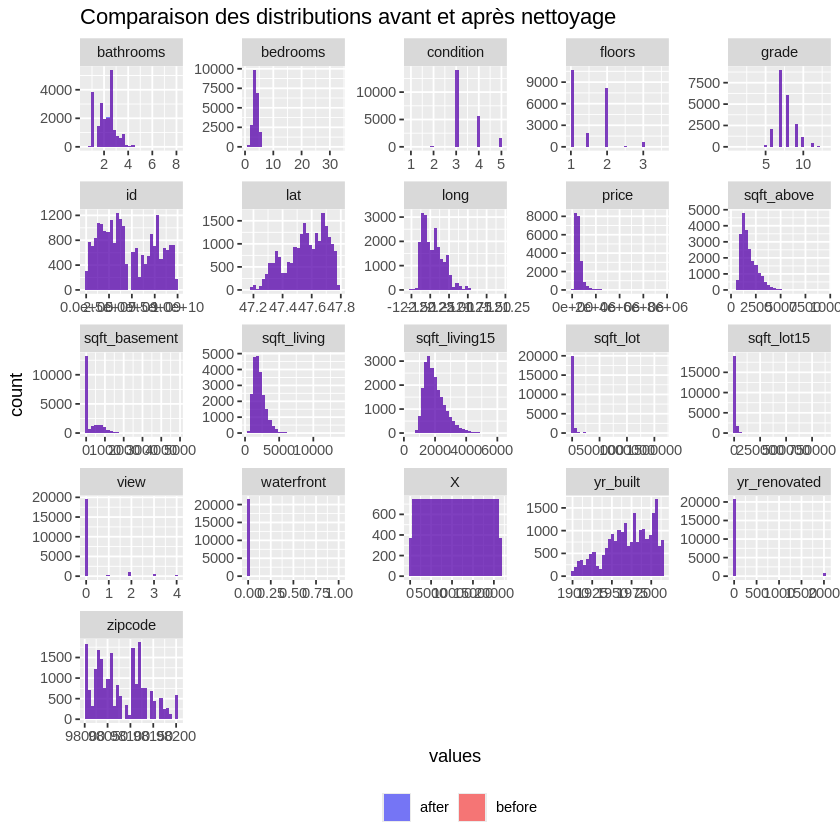

In [ ]:
# Chargement des librairies nécessaires
library(tidyverse)


# Vérification et sélection des variables numériques
num_vars <- sapply(dataset, is.numeric)
if (all(num_vars == FALSE)) {
  stop("No numeric variables found in the dataset.")
}

# Conversion en format long pour les visualisations avant et après nettoyage
data_long <- dataset %>%
  select(which(num_vars)) %>%
  pivot_longer(cols = everything(), names_to = "variables", values_to = "values")

data_clean_long <- dataset_cleaned %>%
  select(which(num_vars)) %>%
  pivot_longer(cols = everything(), names_to = "variables", values_to = "values")

# Vérifiez que les données transformées ne sont pas vides
if (nrow(data_long) == 0 | nrow(data_clean_long) == 0) {
  stop("Transformed data contains no rows. Check your data selection and transformation steps.")
}

# Affichage des histogrammes côte à côte
ggplot(data_long, aes(x = values, fill = "before")) +
  geom_histogram(alpha = 0.5, bins = 30, position = "identity") +
  geom_histogram(data = data_clean_long, aes(x = values, fill = "after"), alpha = 0.5, bins = 30, position = "identity") +
  facet_wrap(~variables, scales = "free") +
  labs(title = "Comparaison des distributions avant et après nettoyage") +
  theme(legend.position = "bottom") +
  scale_fill_manual(name = "", values = c("before" = "red", "after" = "blue"))




In [ ]:
# Exportation du fichier nettoyé
write.csv(dataset_cleaned, "Cleaned_Dataset_House_data.csv", row.names = FALSE)

# Code pour télécharger le fichier dans Colab
system("ls", intern = TRUE) # vérifier que le fichier est bien présent



[1] "Cleaned_Dataset_House_data.csv" "Dataset_House_data.csv"        
[3] "sample_data"

In [8]:
if (!require("keras")) install.packages("keras", dependencies = TRUE)
if (!require("tidyverse")) install.packages("tidyverse")
if (!require("caret")) install.packages("caret")
if (!require("Metrics")) install.packages("Metrics")
library(keras)
library(tidyverse)
library(caret)
library(Metrics)



Loading required package: caret

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘caret’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: lattice


Attaching package: ‘caret’


The following objects are masked from ‘package:Metrics’:

    precision, recall


The following object is masked from ‘package:purrr’:

    lift




In [12]:
# Chargement des données nettoyées
data_path <- "Cleaned_Dataset_House_data.csv"
dataset <- read.csv(data_path)

# Séparation des données en ensembles de formation et de test
set.seed(123)
index <- createDataPartition(dataset$price, p = 0.8, list = FALSE)
train_data <- dataset[index, ]
test_data <- dataset[-index, ]

# Prétraitement: Normalisation des caractéristiques
preproc <- preProcess(train_data[-ncol(train_data)], method = c("center", "scale"))
train_features <- predict(preproc, train_data[-ncol(train_data)])
test_features <- predict(preproc, test_data[-ncol(train_data)])
train_labels <- train_data$price
test_labels <- test_data$price

# Convertir les features et labels en matrices pour Keras
train_features_matrix <- as.matrix(train_features)
test_features_matrix <- as.matrix(test_features)
train_labels_vector <- as.vector(train_labels)
test_labels_vector <- as.vector(test_labels)




In [14]:
# Vérifier les types de données et convertir les facteurs ou les chaînes en numériques
train_features[] <- lapply(train_features, function(x) {
  if(is.factor(x) || is.character(x)) as.numeric(as.character(x)) else x
})
test_features[] <- lapply(test_features, function(x) {
  if(is.factor(x) || is.character(x)) as.numeric(as.character(x)) else x
})

# Gestion des valeurs NA qui pourraient résulter de la conversion
train_features[is.na(train_features)] <- 0
test_features[is.na(test_features)] <- 0

# Conversion en matrices
train_features_matrix <- as.matrix(train_features)
test_features_matrix <- as.matrix(test_features)


Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”


In [ ]:
# Modèle 1: Réseau Dense Basique

In [15]:
model1 <- keras_model_sequential() %>%
  layer_dense(units = 64, activation = 'relu', input_shape = c(ncol(train_features_matrix))) %>%
  layer_dense(units = 64, activation = 'relu') %>%
  layer_dense(units = 1)
model1 %>% compile(optimizer = 'adam', loss = 'mse', metrics = 'mean_absolute_error')






In [17]:
history1 <- model1 %>% fit(
  x = train_features_matrix,
  y = train_labels_vector,
  epochs = 100,
  batch_size = 128,
  validation_split = 0.2
)


In [ ]:
# Modèle 2: Réseau Plus Profond

In [19]:
# Assurer que les features et labels sont des matrices
train_features_matrix <- as.matrix(train_features)
train_labels_vector <- as.vector(train_labels)

# Transformer en arrays si nécessaire (Dépend de l'interface R à Python que vous utilisez)
train_features_array <- keras::array_reshape(train_features_matrix, dim = c(nrow(train_features_matrix), ncol(train_features_matrix)))
train_labels_array <- keras::array_reshape(train_labels_vector, dim = c(length(train_labels_vector), 1))



In [20]:
model3 <- keras_model_sequential() %>%
  layer_dense(units = 128, activation = 'relu', input_shape = c(ncol(train_features_matrix))) %>%
  layer_dense(units = 128, activation = 'relu') %>%
  layer_dense(units = 64, activation = 'relu') %>%
  layer_dense(units = 1)

model3 %>% compile(
  optimizer = 'adam',
  loss = 'mse',
  metrics = 'mean_absolute_error'
)


In [21]:
history3 <- model3 %>% fit(
  x = train_features_array,
  y = train_labels_array,
  epochs = 100,
  batch_size = 128,
  validation_split = 0.2
)


In [ ]:
# Modèle 3: Réseau avec Dropout

In [23]:
# Convertir les dataframes R en matrices NumPy
train_features_matrix <- as.matrix(train_features)
train_labels_vector <- as.numeric(train_labels)

# Assurez-vous que les données d'entrée et de sortie sont bien des vecteurs ou matrices
train_features_matrix <- keras::array_reshape(train_features_matrix, dim = c(nrow(train_features_matrix), ncol(train_features_matrix)))
train_labels_vector <- keras::array_reshape(train_labels_vector, dim = c(length(train_labels_vector), 1))




In [24]:
model2 <- keras_model_sequential() %>%
  layer_dense(units = 128, activation = 'relu', input_shape = ncol(train_features_matrix)) %>%
  layer_dropout(rate = 0.4) %>%
  layer_dense(units = 64, activation = 'relu') %>%
  layer_dense(units = 1)

model2 %>% compile(
  optimizer = 'adam',
  loss = 'mse',
  metrics = 'mae'
)


In [25]:
history2 <- model2 %>% fit(
  x = train_features_matrix,
  y = train_labels_vector,
  epochs = 100,
  batch_size = 128,
  validation_split = 0.2
)


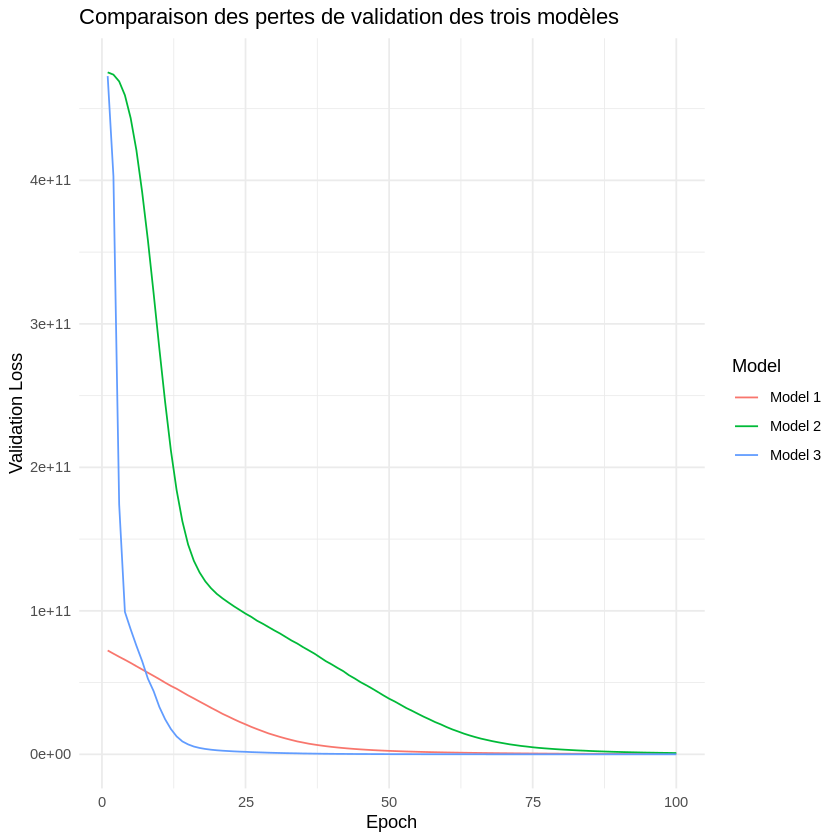

In [26]:
# Installer et charger les packages nécessaires pour la visualisation
if (!require("ggplot2")) install.packages("ggplot2", dependencies = TRUE)
library(ggplot2)

# Préparer les données pour le graphique
plot_data <- data.frame(
  Epoch = rep(1:100, 3),
  Loss = c(history1$metrics$val_loss, history2$metrics$val_loss, history3$metrics$val_loss),
  Model = factor(rep(c("Model 1", "Model 2", "Model 3"), each = 100))
)

# Graphique des pertes de validation pour chaque modèle
ggplot(plot_data, aes(x = Epoch, y = Loss, color = Model)) +
  geom_line() +
  ggtitle("Comparaison des pertes de validation des trois modèles") +
  labs(x = "Epoch", y = "Validation Loss") +
  theme_minimal()



In [28]:
# Vérifier la structure des sorties d'évaluation
print(mse1)
print(mse2)
print(mse3)

# Utiliser str pour obtenir plus de détails sur la structure
str(mse1)
str(mse2)
str(mse3)



               loss mean_absolute_error 
       263801824.00             8324.96 
        loss          mae 
909298752.00     21697.58 
               loss mean_absolute_error 
       3872346.0000            866.1364 
 Named num [1:2] 2.64e+08 8.32e+03
 - attr(*, "names")= chr [1:2] "loss" "mean_absolute_error"
 Named num [1:2] 9.09e+08 2.17e+04
 - attr(*, "names")= chr [1:2] "loss" "mae"
 Named num [1:2] 3872346 866
 - attr(*, "names")= chr [1:2] "loss" "mean_absolute_error"


In [29]:

results <- data.frame(
  Model = c("Model 1", "Model 2", "Model 3"),
  MSE = c(mse1[1], mse2[1], mse3[1]),
  MAE = c(mse1[2], mse2[2], mse3[2])
)

print(results)


    Model       MSE        MAE
1 Model 1 263801824  8324.9600
2 Model 2 909298752 21697.5781
3 Model 3   3872346   866.1364


ERROR: Error in mse1$loss: $ operator is invalid for atomic vectors


In [33]:
# Sauvegarde du modèle sélectionné
save_model_hdf5(model3, "house_price_prediction_model.h5")
